<a href="https://colab.research.google.com/github/GabrilaGladis/ML-project/blob/main/MiniProject_PLDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gradio

import gradio as gr

In [ ]:
import gradio as gr

# Dummy user database for demonstration purposes
user_db = {}

# Function to handle signup
def signup(username, password):
    if username in user_db:
        return "Username already exists. Please try another."
    else:
        user_db[username] = password
        return f"User {username} signed up successfully!"

# Function to handle login
def login(username, password):
    if username in user_db and user_db[username] == password:
        return f"Welcome back, {username}!"
    else:
        return "Invalid username or password. Please try again."

# Signup interface
def signup_interface():
    with gr.Blocks() as signup_page:
        gr.Markdown("<h2 style='text-align: center; color: #28a745;'>Signup</h2>")
        username_input = gr.Textbox(label="Username", placeholder="Enter username")
        password_input = gr.Textbox(label="Password", placeholder="Enter password", type="password")
        signup_button = gr.Button("Sign Up")
        signup_output = gr.Textbox(label="Signup Status", interactive=False)

        signup_button.click(fn=signup, inputs=[username_input, password_input], outputs=signup_output)

    return signup_page

# Login interface
def login_interface():
    with gr.Blocks() as login_page:
        gr.Markdown("<h2 style='text-align: center; color: #007bff;'>Login</h2>")
        username_input = gr.Textbox(label="Username", placeholder="Enter username")
        password_input = gr.Textbox(label="Password", placeholder="Enter password", type="password")
        login_button = gr.Button("Login")
        login_output = gr.Textbox(label="Login Status", interactive=False)

        login_button.click(fn=login, inputs=[username_input, password_input], outputs=login_output)

    return login_page

# Main interface
with gr.Blocks(css="body { background-color: #f8f9fa; }") as main_page:
    gr.Markdown("<h1 style='text-align: center; color: #333;'>Plant Disease Detection System</h1>")

    # Option to choose between login and signup
    with gr.Tabs():
        with gr.Tab("Login"):
            login_interface()
        with gr.Tab("Signup"):
            signup_interface()

# Launch the Gradio app
main_page.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ee4a2301d07c1fe1d5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!pip install ultralytics
!pip install matplotlib
!pip install opencv-python-headless

import os
import zipfile

# Unzipping the uploaded file (Assuming the file is uploaded to '/mnt/data/')
zip_file_path = '/content/archive (2) (2).zip'
extract_dir = '/content/dataset/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")


Files extracted to /content/dataset/


In [ ]:
!pip install ultralytics


In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model (pre-trained)
model = YOLO('yolov8n.pt')  # yolov8n.pt is the smallest and fastest model

# Training the model on your dataset (assuming dataset is in YOLO format)
model.train(data=f'{extract_dir}/data.yaml', epochs=5, imgsz=640)

# Save the trained model
model.save('plant_disease_yolov8.pt')

Ultralytics 8.3.10 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset//data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

train: Scanning /content/dataset/train/labels.cache... 645 images, 18 backgrounds, 0 corrupt: 100%|██████████| 645/645 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/valid/labels.cache... 61 images, 2 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.497      3.896      1.274         33        640: 100%|██████████| 41/41 [09:47<00:00, 14.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.21s/it]

                   all         61        196    0.00105      0.163     0.0742     0.0429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.461      2.875      1.249         14        640: 100%|██████████| 41/41 [09:35<00:00, 14.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.93s/it]

                   all         61        196     0.0377      0.244      0.162      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G       1.47      2.416      1.215         22        640: 100%|██████████| 41/41 [09:39<00:00, 14.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.84s/it]

                   all         61        196      0.865      0.163      0.254      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.337      2.126      1.164         15        640: 100%|██████████| 41/41 [09:44<00:00, 14.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.90s/it]

                   all         61        196      0.827      0.273      0.301      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.294      2.005      1.144         27        640: 100%|██████████| 41/41 [09:52<00:00, 14.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.28s/it]

                   all         61        196      0.569      0.293      0.324      0.222



5 epochs completed in 0.842 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.10 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 186 layers, 2,685,733 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.72s/it]


                   all         61        196      0.569      0.293      0.324      0.222
        Bacterial Spot          3          4          0          0    0.00587    0.00305
          Early_Blight         31         96      0.661      0.467      0.626      0.309
               Healthy         19         19      0.951          1      0.995      0.816
           Late_blight         13         29      0.374      0.586      0.498      0.375
             Leaf Mold          4          7          1          0          0          0
           Target_Spot          5          6          1          0    0.00285    0.00143
            black spot         21         35          0          0      0.138     0.0465
Speed: 3.5ms preprocess, 247.8ms inference, 0.0ms loss, 18.4ms postprocess per image
Results saved to runs/detect/train2



image 1/31 /content/dataset/test/images/IMG_0219_JPG.rf.c8d288f364390a28656a50ed7415713a.jpg: 640x640 1 Healthy, 362.8ms
image 2/31 /content/dataset/test/images/IMG_0233_JPG.rf.b27c3e2dd843cab5e0f652fd1ce5659a.jpg: 640x640 1 Late_blight, 375.0ms
image 3/31 /content/dataset/test/images/IMG_0249_JPG.rf.412df0b52b549fc121a346eb8a957ab0.jpg: 640x640 (no detections), 359.3ms
image 4/31 /content/dataset/test/images/IMG_0277_JPG.rf.84073f240decbc79e30716373f3dd507.jpg: 640x640 (no detections), 403.3ms
image 5/31 /content/dataset/test/images/IMG_0281_JPG.rf.a29c913abceeed1ea6092ab0f2c92b0d.jpg: 640x640 (no detections), 344.3ms
image 6/31 /content/dataset/test/images/IMG_0288_JPG.rf.ca824ec09b29571c39dc6b6ee6b0f6a7.jpg: 640x640 (no detections), 340.0ms
image 7/31 /content/dataset/test/images/IMG_0299_JPG.rf.d19f0cf7d3997c407f195ae8c59cd046.jpg: 640x640 1 Late_blight, 310.5ms
image 8/31 /content/dataset/test/images/IMG_0300_JPG.rf.9294551b97cedde7e681b52876aed944.jpg: 640x640 1 Healthy, 226.8ms

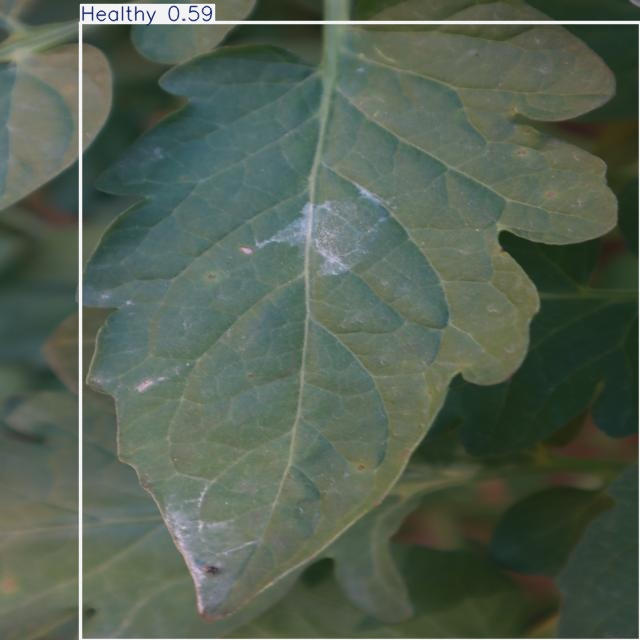

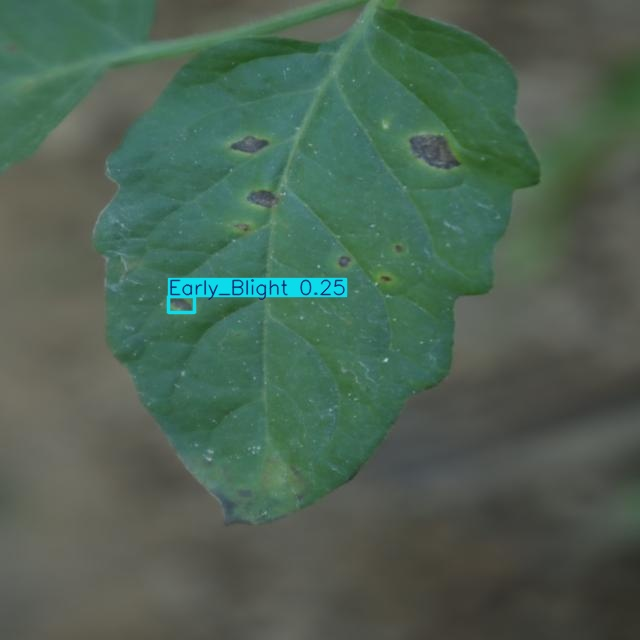

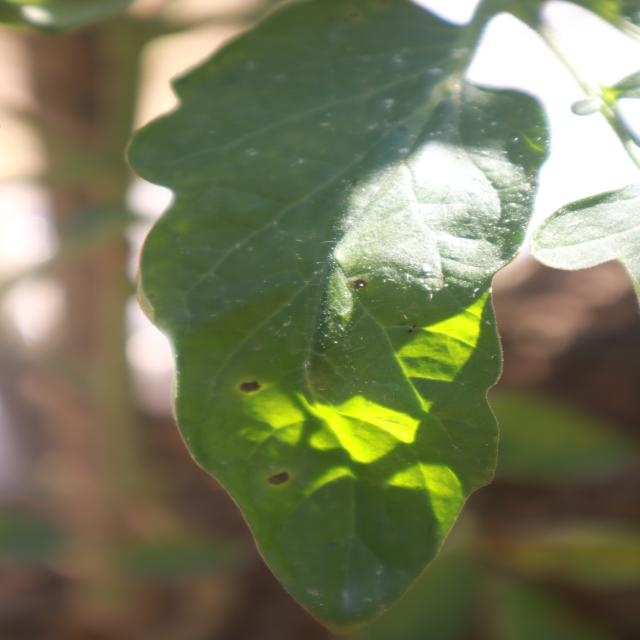

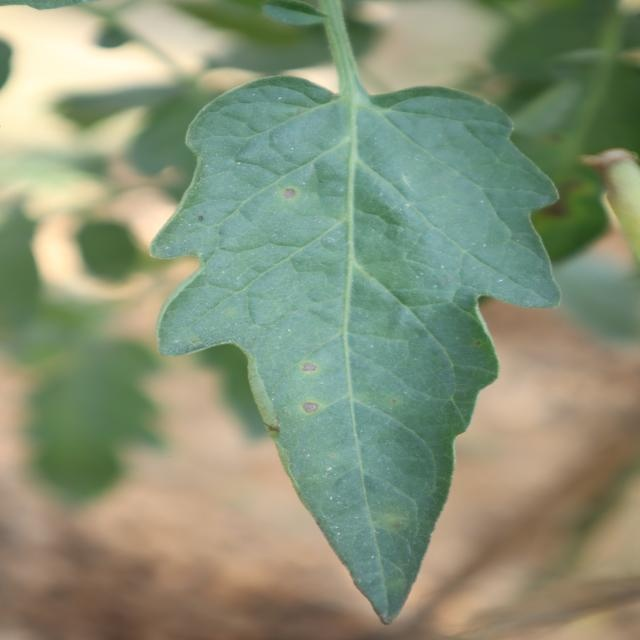

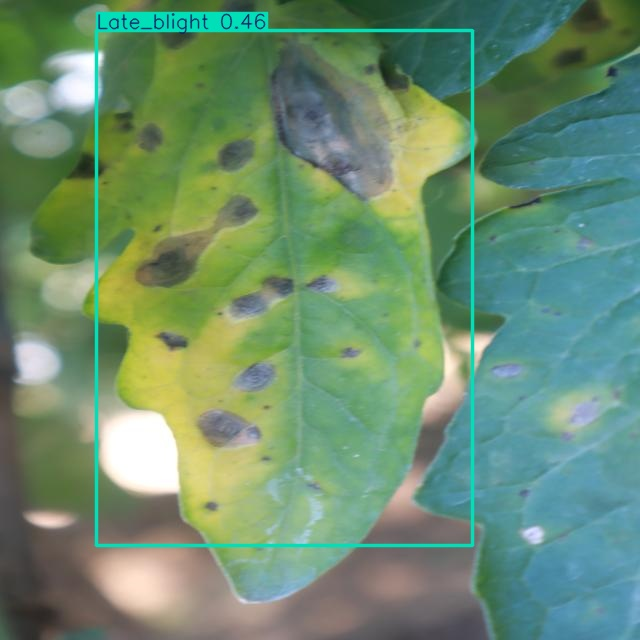

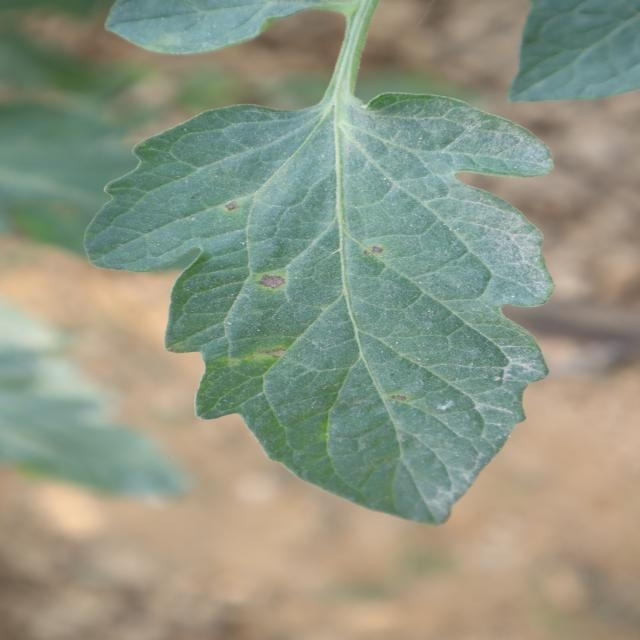

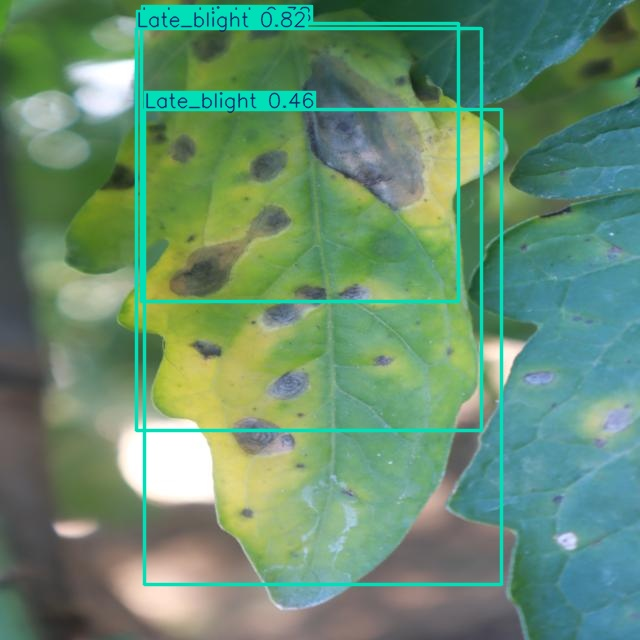

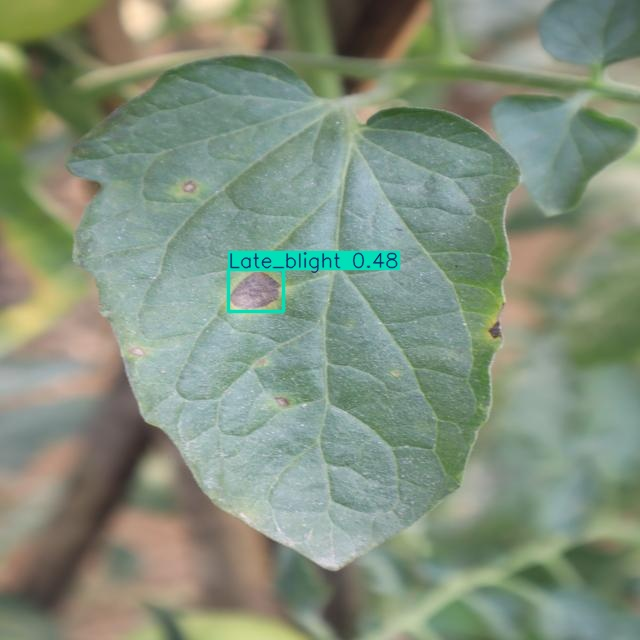

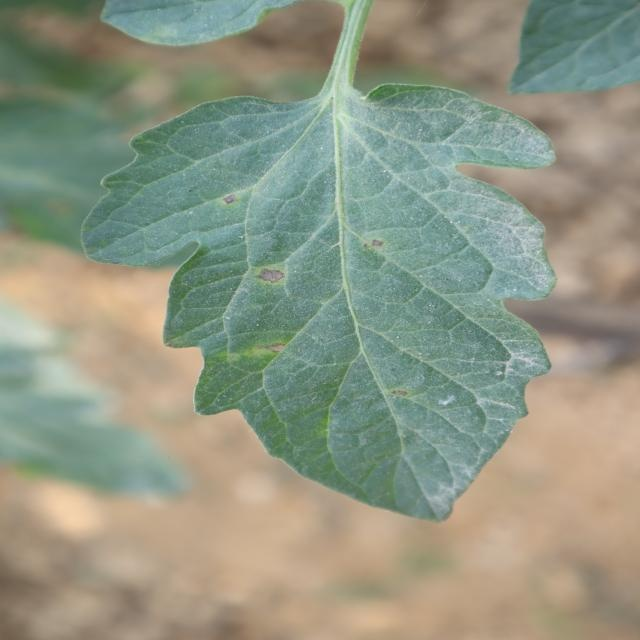

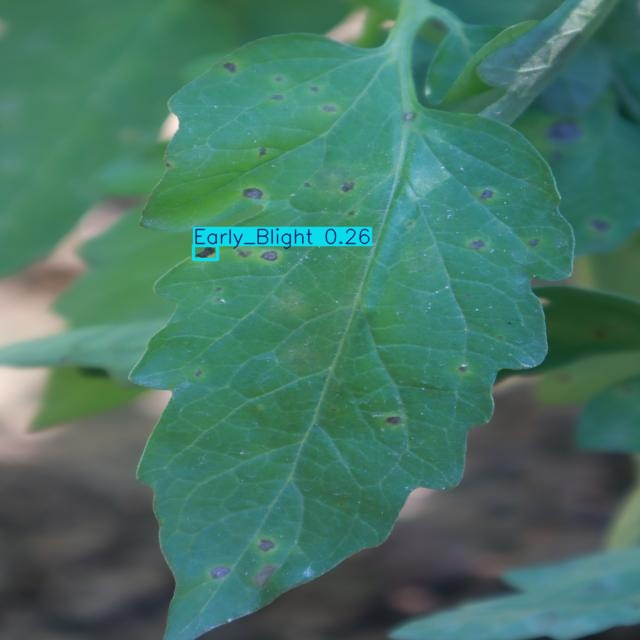

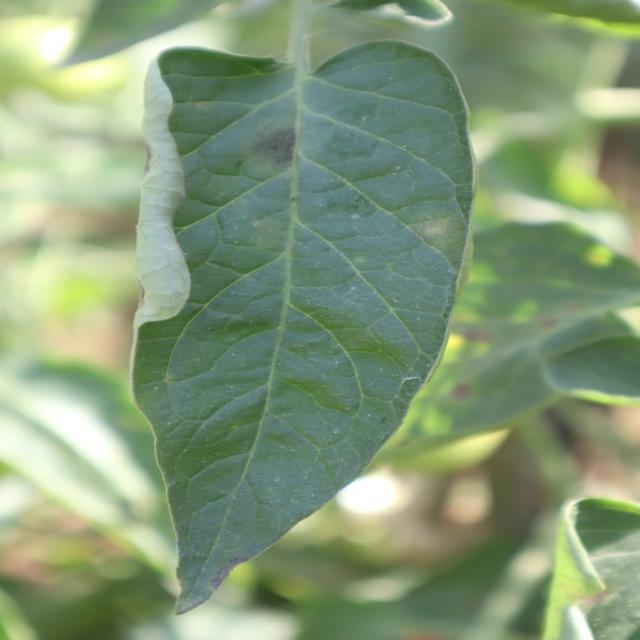

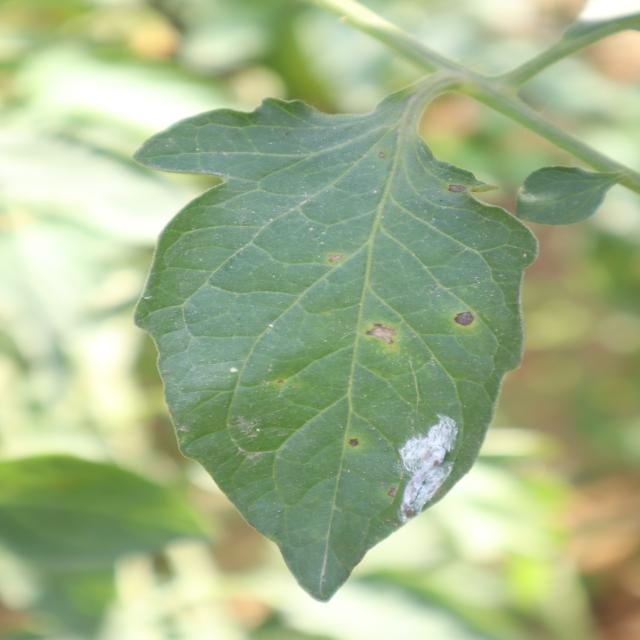

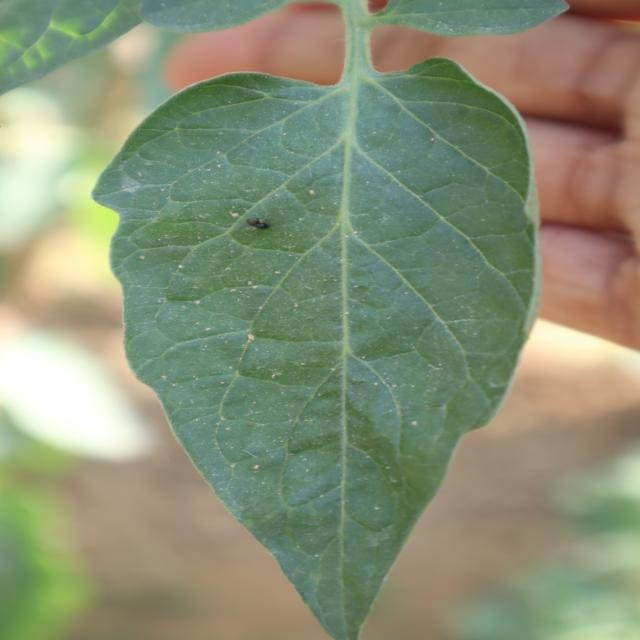

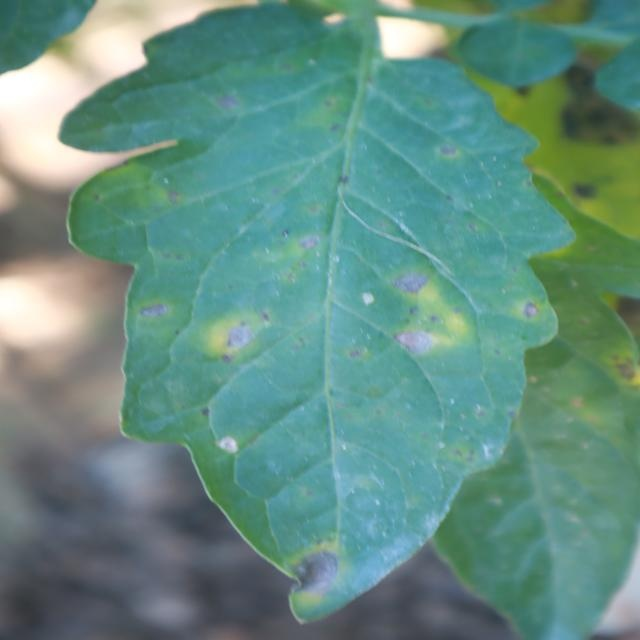

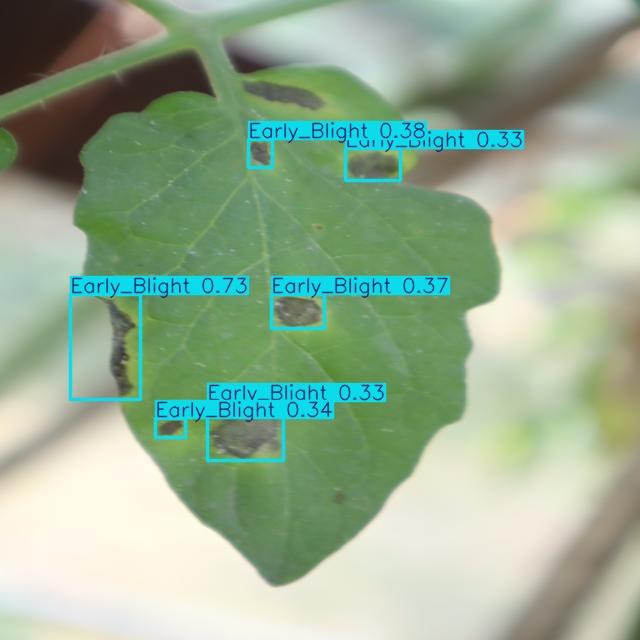

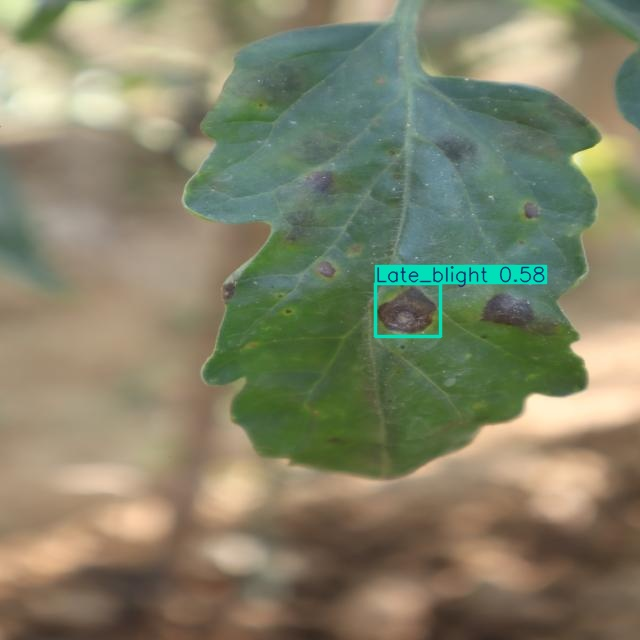

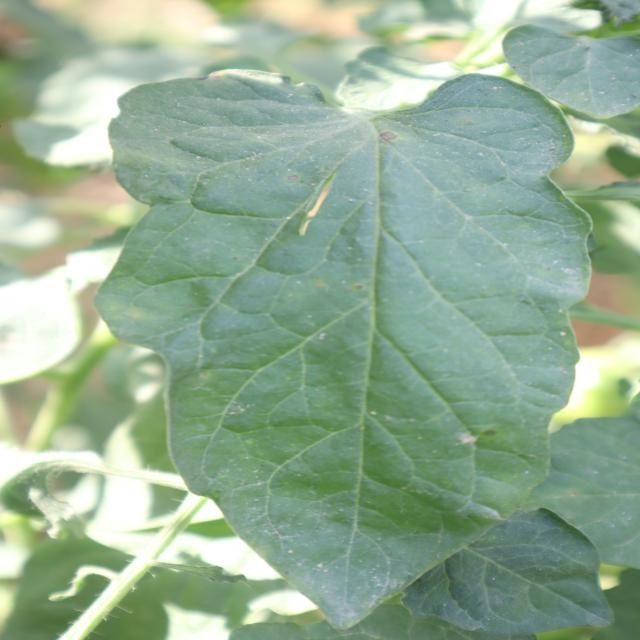

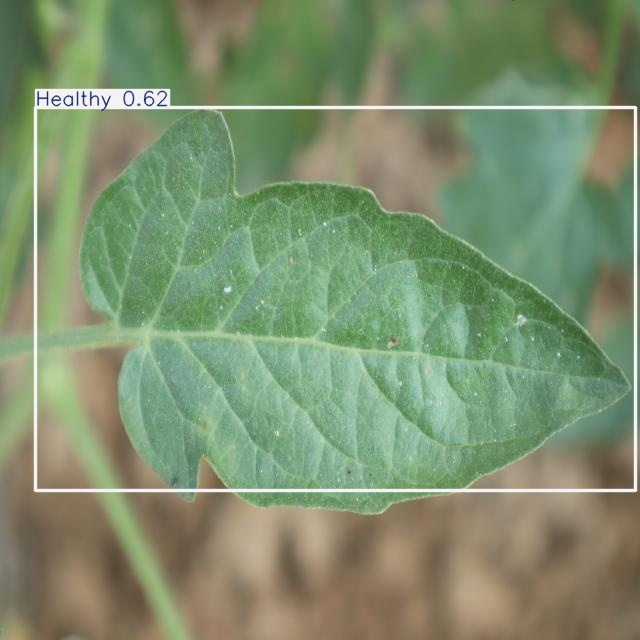

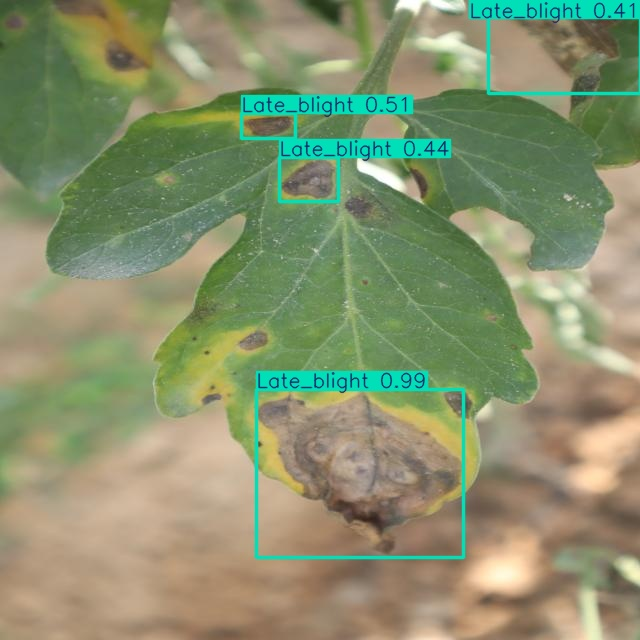

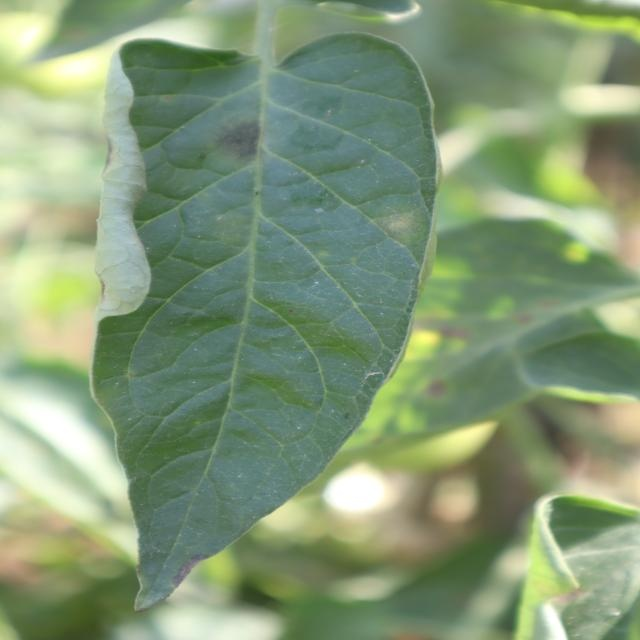

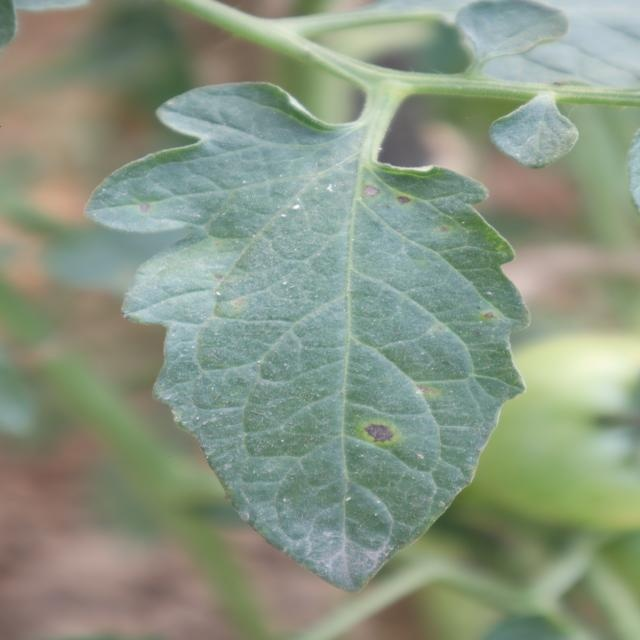

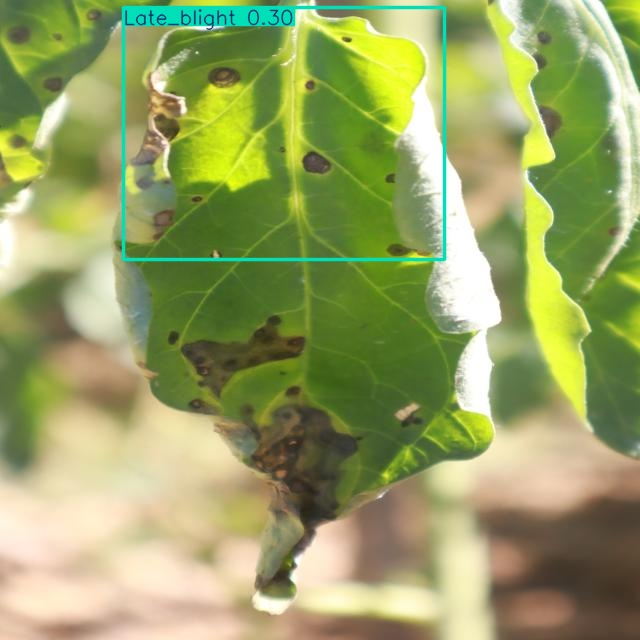

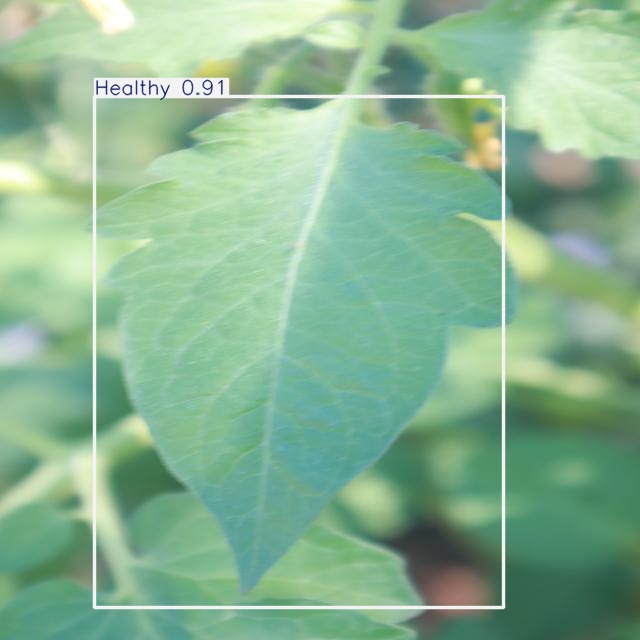

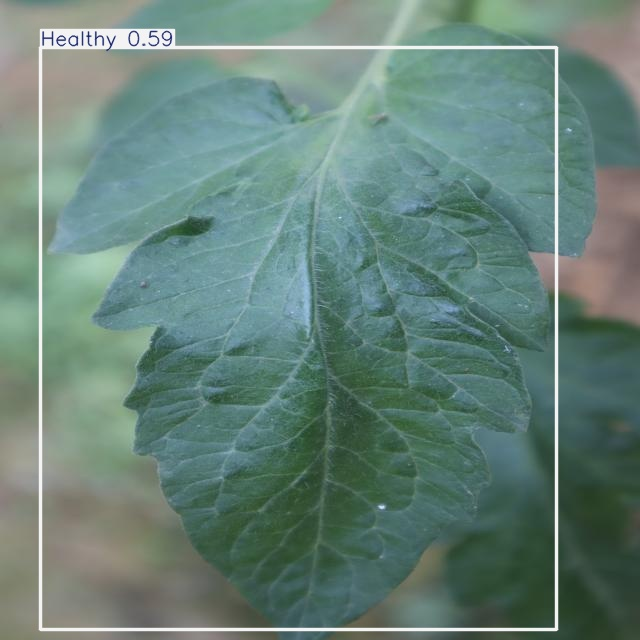

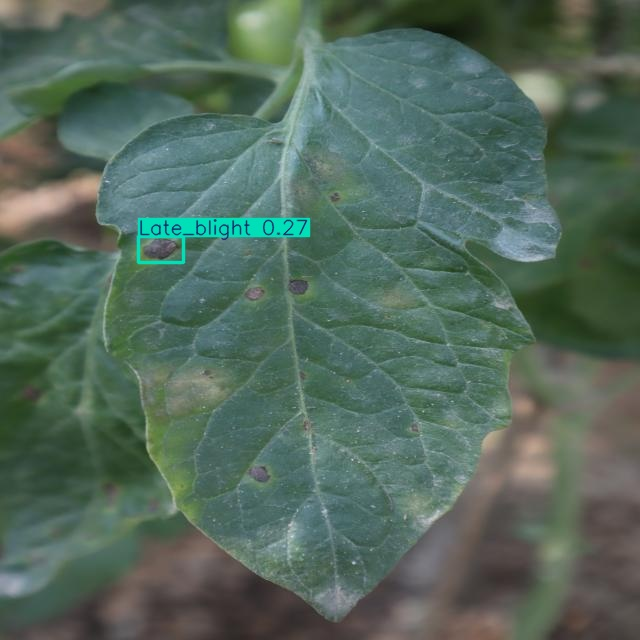

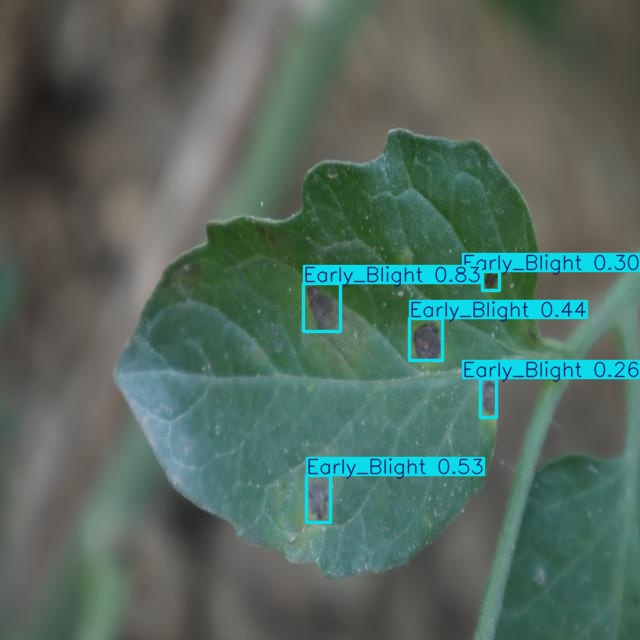

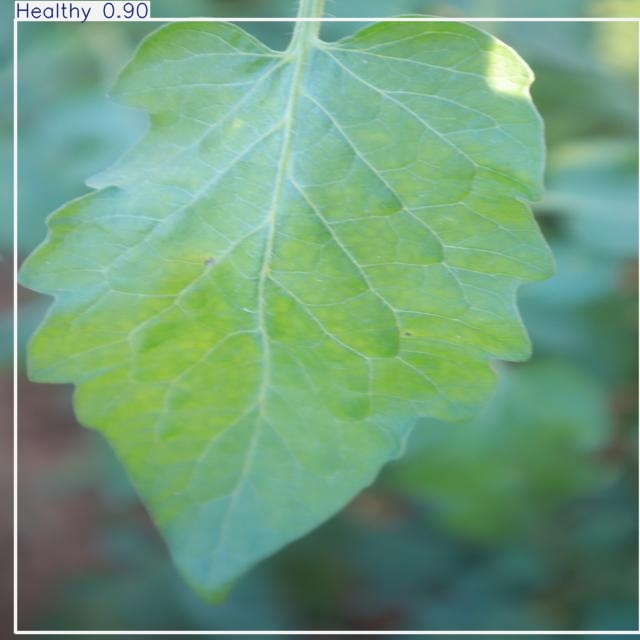

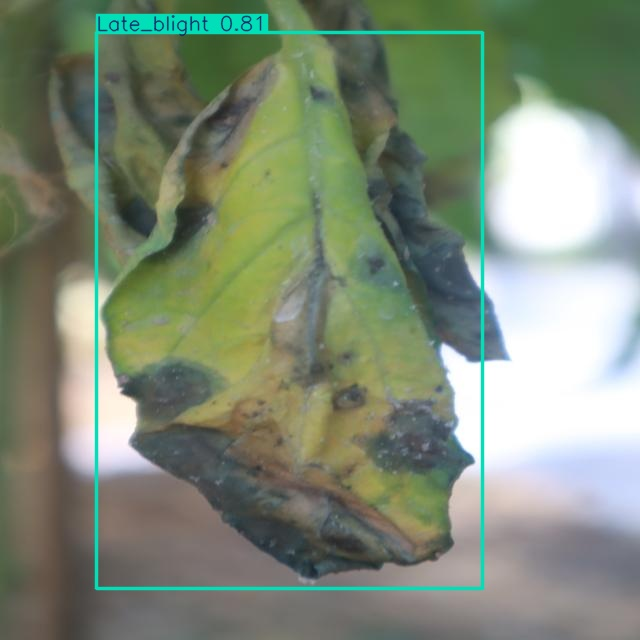

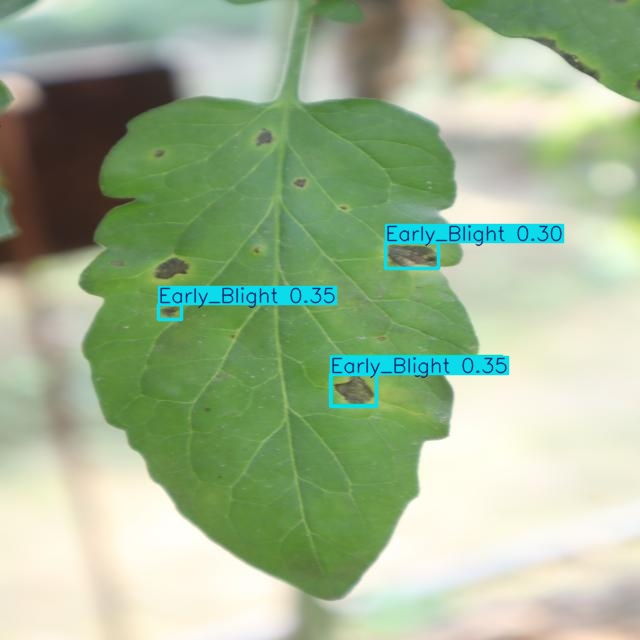

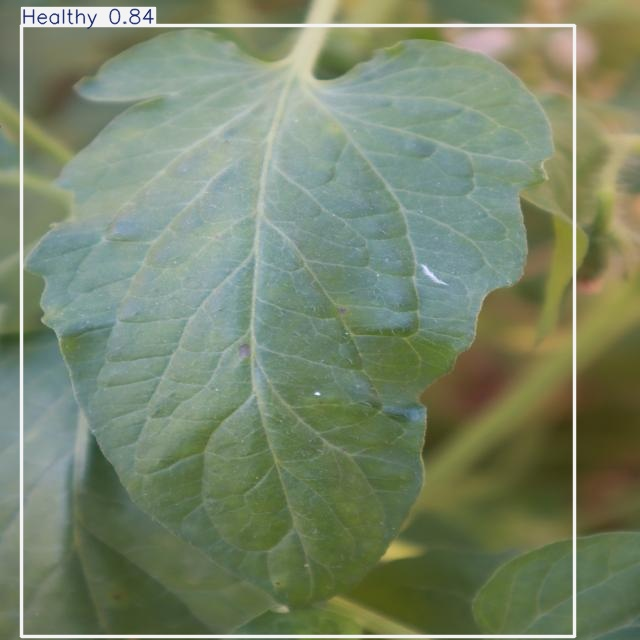

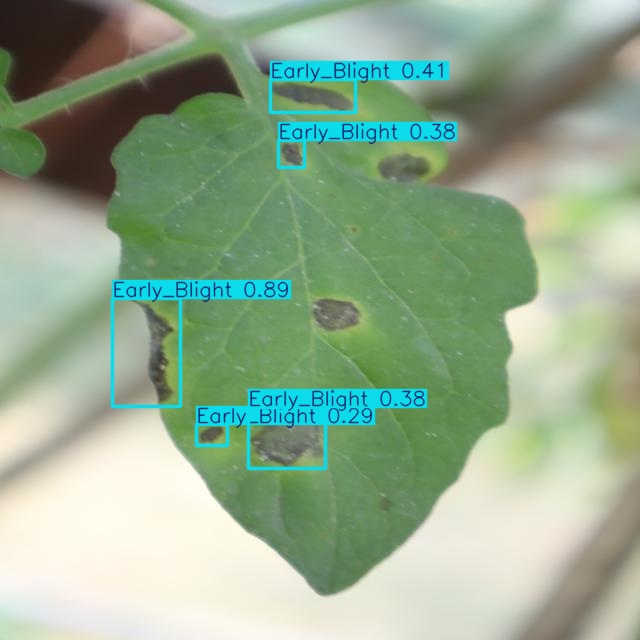

In [ ]:
# Load the best model after training
model = YOLO('/content/runs/detect/train2/weights/best.pt')  # Path to the best model after training

# Perform predictions on the validation set or any test images
results = model.predict(source='/content/dataset/test/images', save=True, conf=0.25)  # Change source to your test images

# Visualize the results
from IPython.display import Image, display
import glob

# Display all saved images with predictions
image_paths = glob.glob('/content/runs/detect/predict/*.jpg')  # Path where YOLOv8 saves predictions

for img_path in image_paths:
    display(Image(filename=img_path))

In [ ]:
from ultralytics import YOLO

# Load the best YOLOv8 model (replace with your model path)
model = YOLO('/content/runs/detect/train2/weights/best.pt')

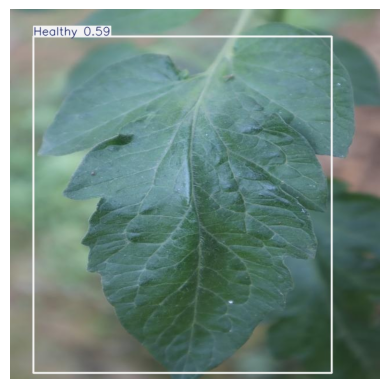

In [ ]:
# Assuming the image is already in your Colab environment
image_path = '/content/runs/detect/predict/IMG_0219_JPG.rf.c8d288f364390a28656a50ed7415713a.jpg'

# Display the image (optional, just to ensure it's the right one)
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis for better display
plt.show()


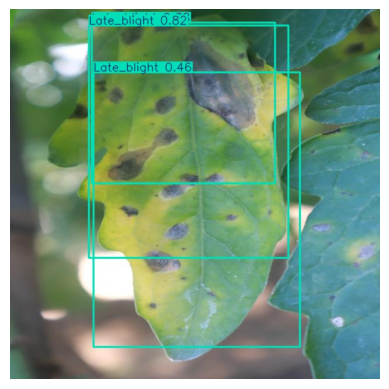

In [ ]:
# Assuming the image is already in your Colab environment
image_path ='/content/runs/detect/predict/IMG_1141_JPG.rf.974b08fa79db2a3fe741383ba39e8603.jpg'

# Display the image (optional, just to ensure it's the right one)
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis for better display
plt.show()


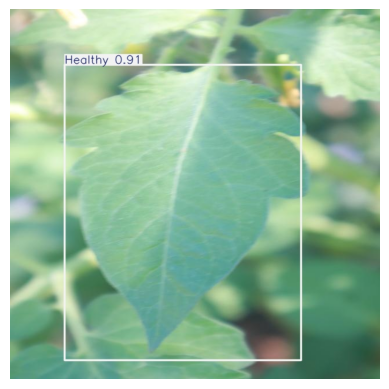

In [ ]:
# Assuming the image is already in your Colab environment
image_path = '/content/runs/detect/predict3/IMG_1150_JPG.rf.b69556095575c09e135bd499d19e23de.jpg'

# Display the image (optional, just to ensure it's the right one)
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis for better display
plt.show()


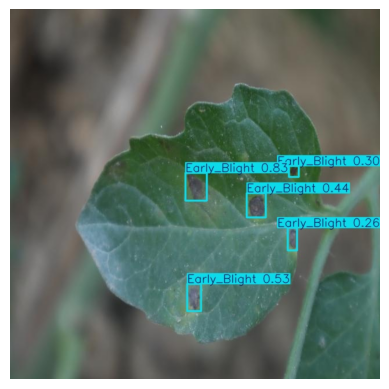

In [ ]:
# Assuming the image is already in your Colab environment
image_path ='/content/runs/detect/predict3/IMG_0371_JPG.rf.eceaf990bab5276fbb1499eb0321f412.jpg'

# Display the image (optional, just to ensure it's the right one)
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis for better display
plt.show()


In [ ]:
from google.colab import files

# Download the YOLOv8n model
files.download('/content/yolov8n.pt')

# Download the plant disease YOLOv8 model
files.download('/content/plant_disease_yolov8.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pip install ultralytics


In [ ]:
# Install necessary libraries
!pip install gradio opencv-python ultralytics

# Import necessary libraries
import gradio as gr
import cv2
import numpy as np
from google.colab import files
from ultralytics import YOLO

# Upload your trained model file
uploaded = files.upload()  # Upload the 'plant_disease_yolov8.pt' model file

# Load your trained YOLOv8 model
model_path = 'plant_disease_yolov8.pt'  # Ensure this matches your uploaded file name
model = YOLO(model_path)  # Load the model directly from the ultralytics package

# Define the prediction function
def predict_leaf(image):
    img_resized = cv2.resize(np.array(image), (640, 640))
    results = model.predict(source=img_resized, conf=0.25)  # Predict with confidence threshold

    output_image = np.array(image).copy()
    for result in results:
        boxes = result.boxes
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0].int().tolist()  # Get the bounding box coordinates
            conf = box.conf[0].item()  # Get the confidence score
            cls = int(box.cls[0])  # Get the class index
            label = f"{model.names[cls]} {conf:.2f}"  # Get the label
            cv2.rectangle(output_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(output_image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    return output_image

# Create and launch the Gradio interface
interface = gr.Interface(fn=predict_leaf,
                         inputs="image",
                         outputs="image",
                         title="Plant Leaf Disease Detection",
                         description="Upload an image of a plant leaf to detect diseases.")
interface.launch()


Saving IMG_1145_JPG.rf.e660dc4161e55a9d5e9ae4339cb033be.jpg to IMG_1145_JPG.rf.e660dc4161e55a9d5e9ae4339cb033be.jpg
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ca28a88afef5541057.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:


# Upload your trained model file
uploaded = files.upload()  # Upload the 'plant_disease_yolov8.pt' model file

# Load your trained YOLOv8 model
model_path = 'plant_disease_yolov8.pt'  # Ensure this matches your uploaded file name
model = YOLO(model_path)  # Load the model directly from the ultralytics package

# Define the prediction function
def predict_leaf(image):
    img_resized = cv2.resize(np.array(image), (640, 640))
    results = model.predict(source=img_resized, conf=0.25)  # Predict with confidence threshold

    output_image = np.array(image).copy()
    for result in results:
        boxes = result.boxes
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0].int().tolist()  # Get the bounding box coordinates
            conf = box.conf[0].item()  # Get the confidence score
            cls = int(box.cls[0])  # Get the class index
            label = f"{model.names[cls]} {conf:.2f}"  # Get the label
            cv2.rectangle(output_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(output_image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    return output_image

# Create and launch the Gradio interface
interface = gr.Interface(fn=predict_leaf,
                         inputs="image",
                         outputs="image",
                         title="Plant Leaf Disease Detection",
                         description="Upload an image of a plant leaf to detect diseases.")
interface.launch()


Saving IMG_1098_JPG.rf.fb3380cce10267127ec5ed201ef7b86a.jpg to IMG_1098_JPG.rf.fb3380cce10267127ec5ed201ef7b86a.jpg
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://87fddc9671035c476b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
